In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

In [5]:
#enter path to csv file
path = './example_ila.csv'
savepath = './example_graph.png'
rates = [(1/10000), (1/100), (1/30), (1/25), (1/20), (1/10), (1/30), (1/40), (1/40) ,(1/100), (1/100), (1/150), (1/150), (1/200), (1/200), (1/10000)]
ila_tigger_interval = 40000
df = pd.read_csv(path)

Text(0.5, 1.0, 'Default Parameters, Sending rate')

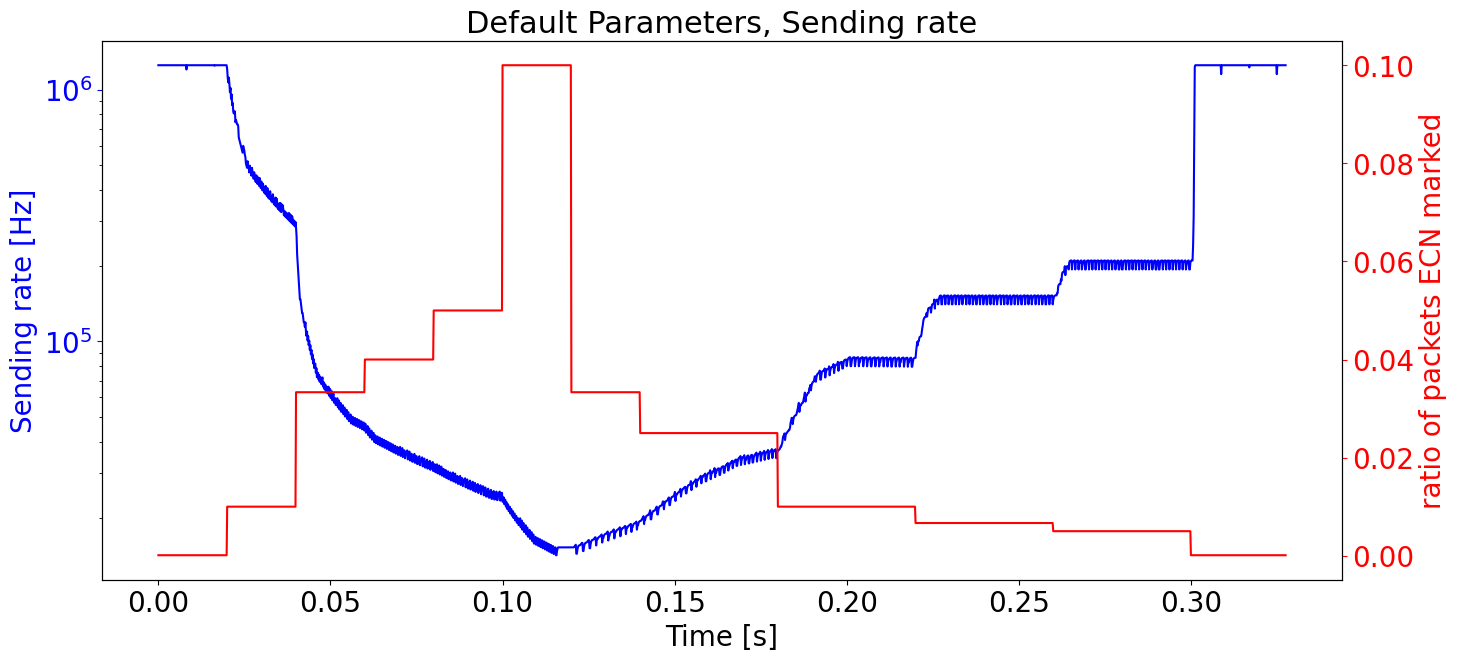

In [6]:
only_trigger_df = df[df['TRIGGER'] == '1']
rate_index = pd.to_numeric(only_trigger_df['inst_shell/inst_network_top/inst_network_stack/inst_roce_stack/inst_rdma_flow/inst_DCQCN/ecn_rates_index[4:0]']).to_list()
RC_gap_cycles = pd.to_numeric(only_trigger_df['inst_shell/inst_network_top/inst_network_stack/inst_roce_stack/inst_rdma_flow/inst_DCQCN/Rc[15:0]']).to_list()
RC_rate_hz = [1/((4*i)/1000000000) for i in RC_gap_cycles]

rate_list = [rates[i] for i in rate_index]

fig, ax1 = plt.subplots(figsize=(16, 7))

x_pre = range(len(RC_gap_cycles))
x = [(i * (ila_tigger_interval)* 4)/1000000000 for i in x_pre]

ax1.plot(x, RC_rate_hz, color='blue', label='Line 1 (left)')
ax1.set_ylabel('Sending rate [Hz]', color='blue', fontsize=20)
ax1.set_yscale('log')
ax1.tick_params(axis='y', colors='blue', labelsize=20)

# For printing packet gap in cycles instead of sendrate

#ax1.plot(x, RC_gap_cycles, color='blue', label='Line 1 (left)')
#ax1.set_ylabel('time between outgoing packets [cycles]', color='blue', fontsize=20)
#ax1.tick_params(axis='y', colors='blue', labelsize=20)

ax2 = ax1.twinx()

ax2.plot(x, rate_list, color='red', label='Line 2 (right)')
ax2.set_ylabel('ratio of packets ECN marked', color='red', fontsize=20)
ax2.tick_params(axis='y', colors='red', labelsize=20)

# Labels and title
ax1.set_xlabel('Time [s]', fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
plt.title('Default Parameters, Sending rate', fontsize=22)

In [7]:
fig.savefig(savepath, dpi=400)